### Business Question
A company wants to cut down on its cost of production, producing only products that meet a revenue target of $1500 or a quantity target of 65 in the 1st, 2nd and 3rd quarter of 2024

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
order = pd.read_csv("ZTH Folder\order_data.csv")

In [6]:
order.head(10)

,order_id,customer_id,order_date,product_id,quantity,delivery_status
0,90001,21,2022-06-03,P18,2,Shipped
1,90002,35,2022-03-03,P16,2,Delivered
2,90003,8,2022-06-26,P40,1,Shipped
3,90004,78,2022-08-20,P33,1,Delivered
4,90005,38,2022-05-17,P13,3,Shipped
5,90006,97,2022-01-25,P27,3,Shipped
6,90007,22,2022-06-05,P32,1,Shipped
7,90008,41,2022-03-13,P22,1,Delivered
8,90009,87,2022-06-12,P17,2,Shipped
9,90010,31,2022-07-01,P28,3,Delivered


In [9]:
product = pd.read_csv("ZTH Folder\product_data.csv")

In [11]:
product.head()

,product_id,product_name,description,product_category,unit_price,unit_cost
0,P01,iPhone X,Apple iPhone X,Mobile Phone,699.99,633.45
1,P02,Acer Nitro 5,Acer Nitro 5 w/ 500GB HDD,Laptop,1699.99,1436.96
2,P03,Samsung S22 Ultra,Samsung S22 Ultra w/ 500GB storage,Mobile Phone,999.99,898.62
3,P04,iPhone 12,Apple iPhone 12 w/ 125GB storage,Mobile Phone,899.99,780.31
4,P05,Lightning Cable,Apple USB Lighting cable,Accessories,10.00,8.81


This two datasets carries all the relevant information needed to solve this business question.

In [14]:
order.isnull().sum()

order_id           0
customer_id        0
order_date         0
product_id         0
quantity           0
delivery_status    0
dtype: int64

In [15]:
product.isnull().sum()

product_id          0
product_name        0
description         0
product_category    0
unit_price          0
unit_cost           0
dtype: int64

To track the products produce in the first 3 quarters, I will need to convert the order_date in the order dataset to datetime format

In [16]:
order["order_date"] = pd.to_datetime(order["order_date"])

#### Filtering for the first three quarters (Jan., 1 - Sept., 30)

In [17]:
order_filtered = order[order["order_date"].between("2024-01-01", "2024-09-30")]

In [18]:
order_filtered.head()

,order_id,customer_id,order_date,product_id,quantity,delivery_status
800,90801,65,2024-01-05,P26,2,Processing
801,90802,47,2024-04-08,P16,2,Shipped
802,90803,73,2024-01-03,P33,1,Shipped
803,90804,14,2024-04-22,P02,3,Processing
804,90805,170,2024-03-24,P11,3,Processing


#### Merging the two dataset to extract information about the relevant products that meet this requirement

In [19]:
data_merged = order_filtered.merge(product, on="product_id", how="left")

In [20]:
data_merged.head()

,order_id,customer_id,order_date,product_id,quantity,delivery_status,product_name,description,product_category,unit_price,unit_cost
0,90801,65,2024-01-05,P26,2,Processing,iPhone 7+,iPhone 7+ w/ 64GB storage,Mobile Phone,125.50,92.85
1,90802,47,2024-04-08,P16,2,Shipped,Xbox 360 gamepad,Xbox 360 USB wire gamepad,Accessories,15.60,14.65
2,90803,73,2024-01-03,P33,1,Shipped,Lenovo IdeaPad Flex 5i,Lenovo - 2022 - IdeaPad Flex 5i - 2-in-1 Chrom...,Laptop,299.99,260.99
3,90804,14,2024-04-22,P02,3,Processing,Acer Nitro 5,Acer Nitro 5 w/ 500GB HDD,Laptop,1699.99,1436.96
4,90805,170,2024-03-24,P11,3,Processing,Dell G7,Dell G series 7 Gaming Laptop w/ 1TB storage,Laptop,2099.99,1573.07


### Calculating the total revenue per each product

In [21]:
data_merged["total_revenue"] = data_merged["quantity"]* data_merged["unit_price"]

In [22]:
data_merged["total_revenue"].head()

0     251.00
1      31.20
2     299.99
3    5099.97
4    6299.97
Name: total_revenue, dtype: float64

In [23]:
data_merged.head()

,order_id,customer_id,order_date,product_id,quantity,delivery_status,product_name,description,product_category,unit_price,unit_cost,total_revenue
0,90801,65,2024-01-05,P26,2,Processing,iPhone 7+,iPhone 7+ w/ 64GB storage,Mobile Phone,125.50,92.85,251.00
1,90802,47,2024-04-08,P16,2,Shipped,Xbox 360 gamepad,Xbox 360 USB wire gamepad,Accessories,15.60,14.65,31.20
2,90803,73,2024-01-03,P33,1,Shipped,Lenovo IdeaPad Flex 5i,Lenovo - 2022 - IdeaPad Flex 5i - 2-in-1 Chrom...,Laptop,299.99,260.99,299.99
3,90804,14,2024-04-22,P02,3,Processing,Acer Nitro 5,Acer Nitro 5 w/ 500GB HDD,Laptop,1699.99,1436.96,5099.97
4,90805,170,2024-03-24,P11,3,Processing,Dell G7,Dell G series 7 Gaming Laptop w/ 1TB storage,Laptop,2099.99,1573.07,6299.97


### Performing Product Aggregate

In [24]:
summary_of_product = data_merged.groupby(["product_id", "product_name"]).agg(total_quantity=("quantity", "sum"), total_revenue=("total_revenue" ,"sum")).reset_index()

In [25]:
summary_of_product.head()

,product_id,product_name,total_quantity,total_revenue
0,P02,Acer Nitro 5,6,10199.94
1,P04,iPhone 12,4,3599.96
2,P05,Lightning Cable,2,20.00
3,P06,USB cable,4,39.96
4,P08,Samsung A20,1,79.99


In [26]:
products_based_on_revenue = summary_of_product[summary_of_product["total_revenue"] >= 1500]

In [27]:
products_based_on_revenue.head(10)

,product_id,product_name,total_quantity,total_revenue
0,P02,Acer Nitro 5,6,10199.94
1,P04,iPhone 12,4,3599.96
5,P09,HP Gaming 15,2,3199.98
6,P10,Dell G5,4,7200.00
7,P11,Dell G7,3,6299.97
17,P23,Samsung S23,2,3599.98
21,P29,Macbook Air 13.6,3,2939.97
23,P33,Lenovo IdeaPad Flex 5i,10,2999.90
24,P36,ASUS ROG Z13,4,5596.00
25,P37,MSI Gaming Laptop,5,4395.00


In [30]:
products_based_on_revenue = products_based_on_revenue.sort_values(by="total_revenue", ascending=False)
products_based_on_revenue.head(10)

,product_id,product_name,total_quantity,total_revenue
0,P02,Acer Nitro 5,6,10199.94
26,P39,SAMSUNG Galaxy Z Fold 4,6,8699.94
6,P10,Dell G5,4,7200.00
7,P11,Dell G7,3,6299.97
24,P36,ASUS ROG Z13,4,5596.00
25,P37,MSI Gaming Laptop,5,4395.00
17,P23,Samsung S23,2,3599.98
1,P04,iPhone 12,4,3599.96
5,P09,HP Gaming 15,2,3199.98
23,P33,Lenovo IdeaPad Flex 5i,10,2999.90


In [31]:
products_based_on_revenue.to_csv("products_based_on_revenue.csv", index=False)

In [38]:
products_based_on_quantity = summary_of_product[summary_of_product["total_quantity"] <=65]

In [39]:
products_based_on_quantity  

,product_id,product_name,total_quantity,total_revenue
0,P02,Acer Nitro 5,6,10199.94
1,P04,iPhone 12,4,3599.96
2,P05,Lightning Cable,2,20.00
3,P06,USB cable,4,39.96
4,P08,Samsung A20,1,79.99
5,P09,HP Gaming 15,2,3199.98
6,P10,Dell G5,4,7200.00
7,P11,Dell G7,3,6299.97
8,P12,Dell Charger 60w,2,31.98
9,P14,HP Charger 60w,3,38.97


In [40]:
products_based_on_quantity = products_based_on_quantity.sort_values(by="total_quantity", ascending=False)

In [41]:
products_based_on_quantity.head()

,product_id,product_name,total_quantity,total_revenue
23,P33,Lenovo IdeaPad Flex 5i,10,2999.90
10,P16,Xbox 360 gamepad,8,124.80
20,P26,iPhone 7+,8,1004.00
0,P02,Acer Nitro 5,6,10199.94
26,P39,SAMSUNG Galaxy Z Fold 4,6,8699.94


C:\Users\HP\AppData\Local\Temp\ipykernel_14288\2939715526.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='total_revenue', ylabel='product_name'>

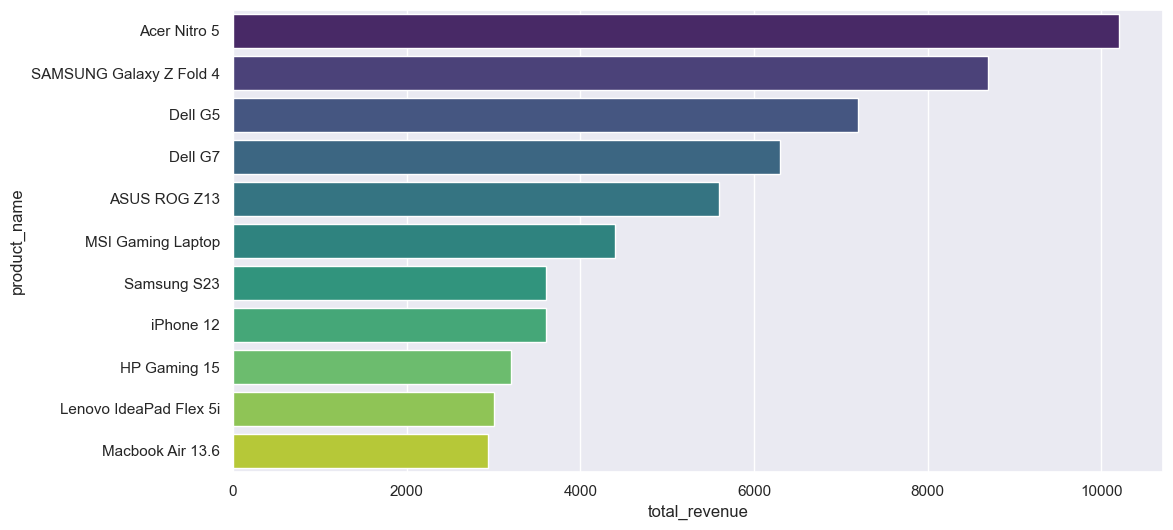

In [45]:
plt.figure(figsize=(12,6))

sns.barplot(
    x="total_revenue",
    y="product_name",
    data = products_based_on_revenue,
    palette = "viridis"
)